<a href="https://colab.research.google.com/github/rohanvitrouthu/sectoralstockanalysis/blob/main/Outliers_%26_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset from the URL
data = pd.read_csv('combined_dataset.csv')

# Replace missing values with mean
data.fillna(data.mean(), inplace=True)

# Display the first five rows of the dataset
data.head()


<ipython-input-5-8c896a7db302>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,61964.270982,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,61964.270982,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,61964.270982,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,61964.270982,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,61964.270982,816123.0,0.2741


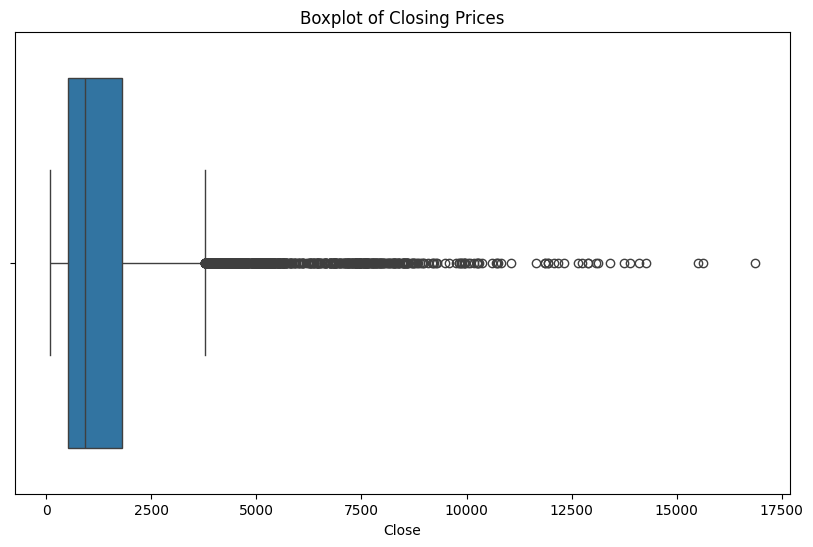

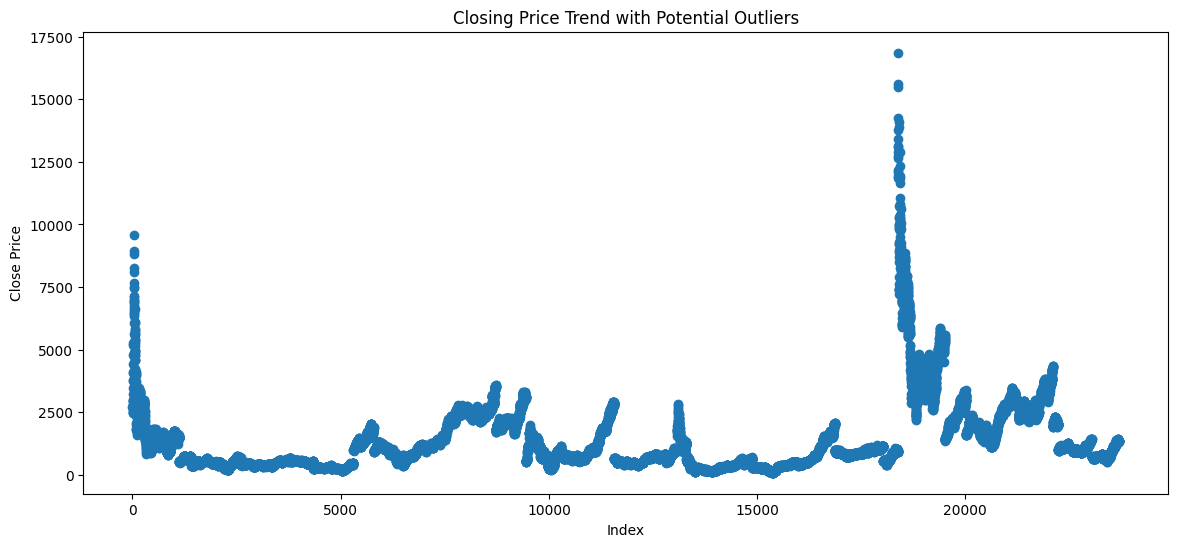

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outliers detected by Isolation Forest:
             Date    Close
30     2000-02-15  7087.55
31     2000-02-16  7654.55
32     2000-02-17  8266.95
33     2000-02-18  8928.35
34     2000-02-21  9587.45
...           ...      ...
18619  2000-12-14  7530.40
18620  2000-12-15  7202.40
18621  2000-12-18  7094.10
18622  2000-12-19  6889.35
18650  2001-01-30  6888.60

[229 rows x 2 columns]


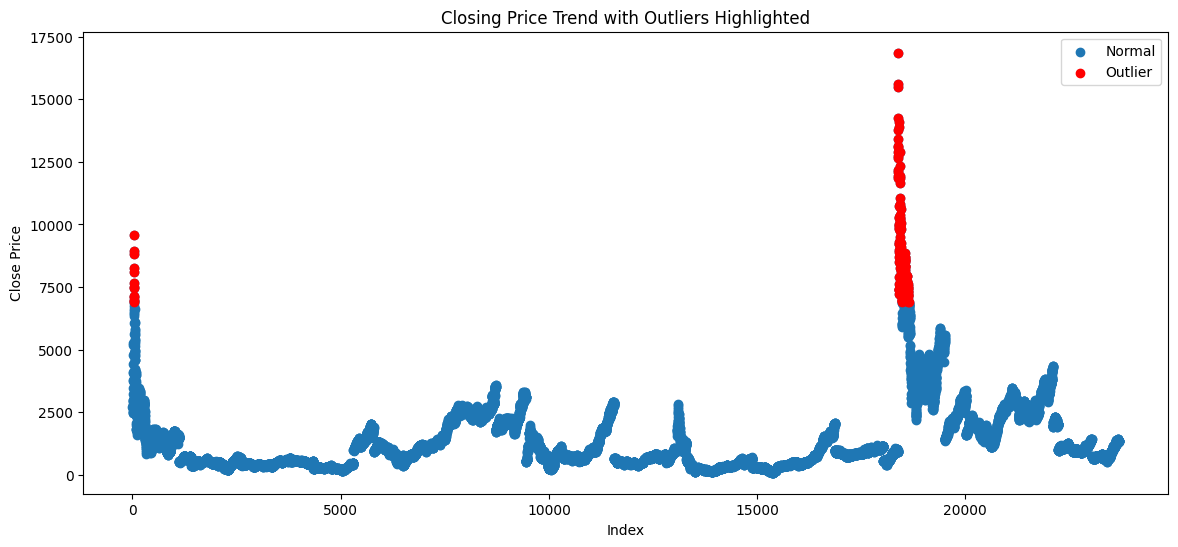

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Load the dataset
df = pd.read_csv('Information_Technology.csv')

# Data visualization for outlier detection
# We will use boxplots to visualize potential outliers in the 'Close' price of the stocks
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Close'])
plt.title('Boxplot of Closing Prices')
plt.show()

# We will also use a scatter plot to visualize the 'Close' prices over time
plt.figure(figsize=(14, 6))
plt.scatter(range(df.shape[0]), df['Close'].values)
plt.title('Closing Price Trend with Potential Outliers')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.show()

# Machine Learning based Outlier Detection using Isolation Forest
# Isolation Forest is good for high-dimensional datasets and works on the principle of isolating anomalies
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fit the model
df['scores'] = iso_forest.fit_predict(df[['Close']])

# Filter the outliers
outliers = df[df['scores'] == -1]
print("Outliers detected by Isolation Forest:")
print(outliers[['Date', 'Close']])

# Visualize the outliers on the scatter plot
plt.figure(figsize=(14, 6))
plt.scatter(range(df.shape[0]), df['Close'].values, label='Normal')
plt.scatter(outliers.index, outliers['Close'].values, color='r', label='Outlier')
plt.title('Closing Price Trend with Outliers Highlighted')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

<ipython-input-12-4fba28015b46>:36: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(data=sector_data, x='Date', y='Close', hue='Outlier', palette=['blue', 'red'])


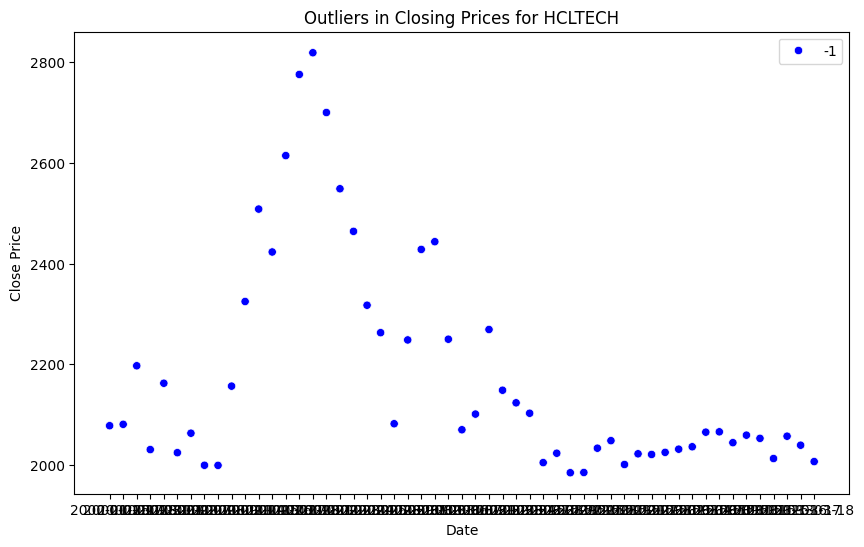

<ipython-input-12-4fba28015b46>:36: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(data=sector_data, x='Date', y='Close', hue='Outlier', palette=['blue', 'red'])


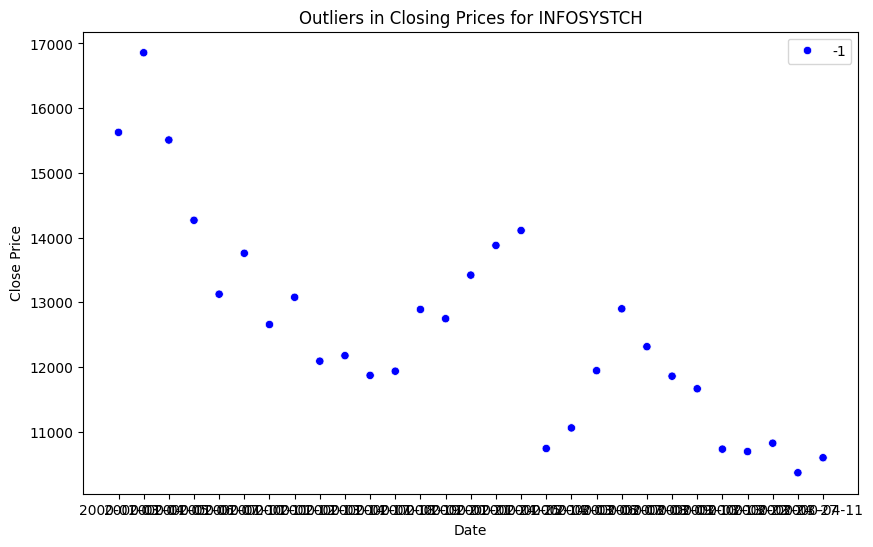

<ipython-input-12-4fba28015b46>:36: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(data=sector_data, x='Date', y='Close', hue='Outlier', palette=['blue', 'red'])


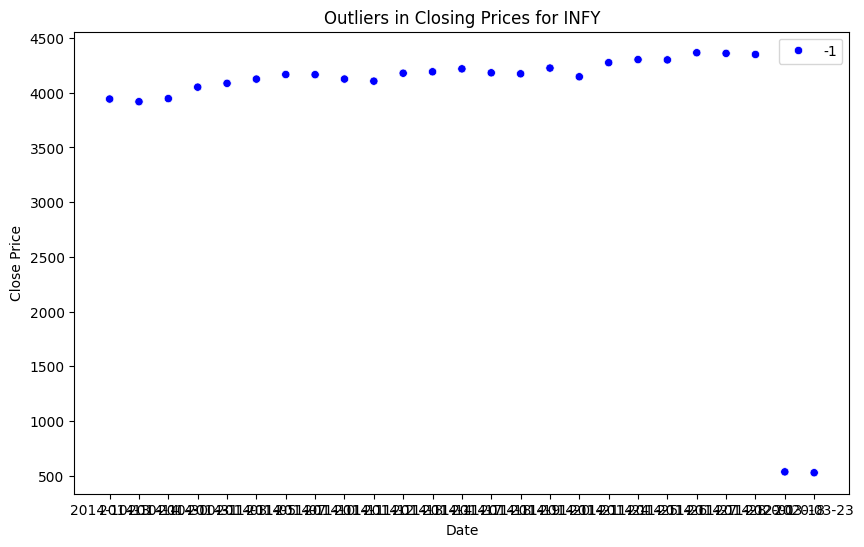

<ipython-input-12-4fba28015b46>:36: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(data=sector_data, x='Date', y='Close', hue='Outlier', palette=['blue', 'red'])


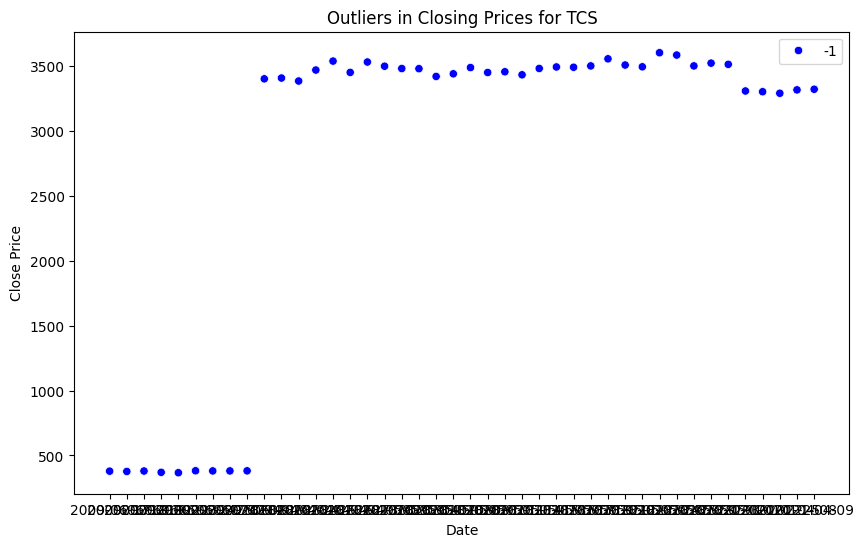

<ipython-input-12-4fba28015b46>:36: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(data=sector_data, x='Date', y='Close', hue='Outlier', palette=['blue', 'red'])


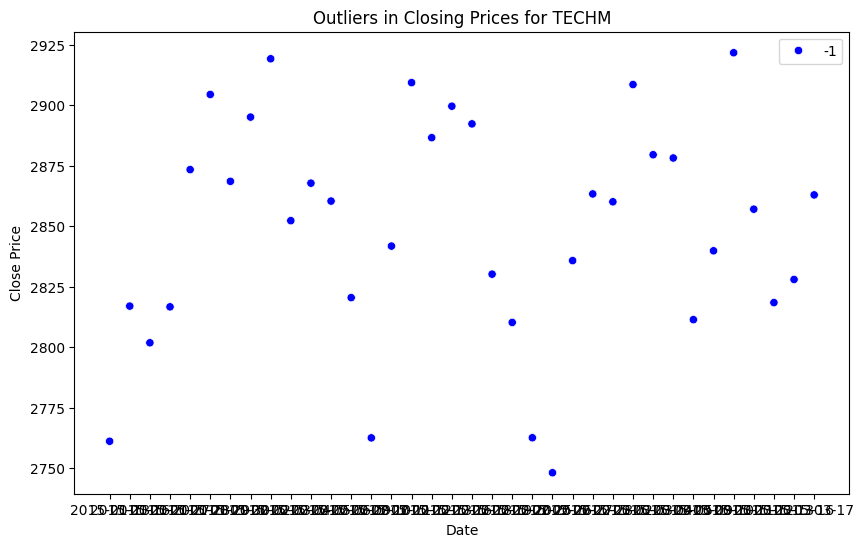

<ipython-input-12-4fba28015b46>:36: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(data=sector_data, x='Date', y='Close', hue='Outlier', palette=['blue', 'red'])


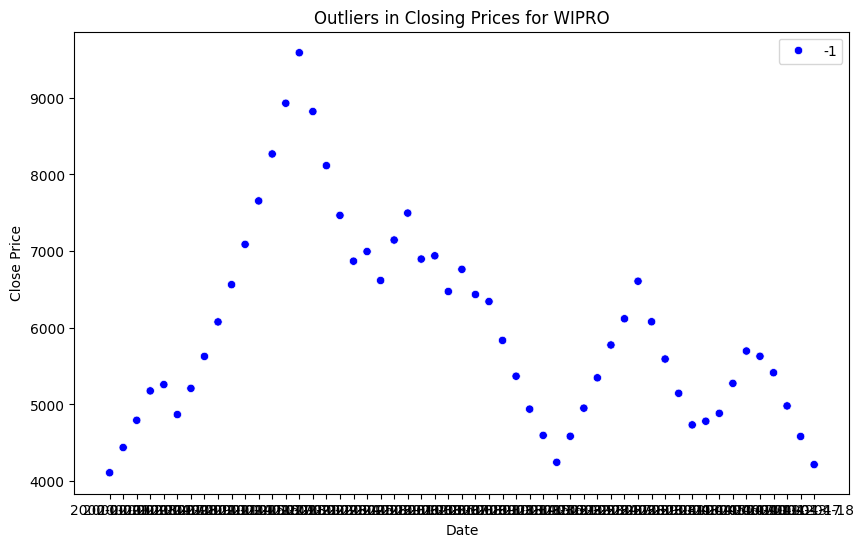

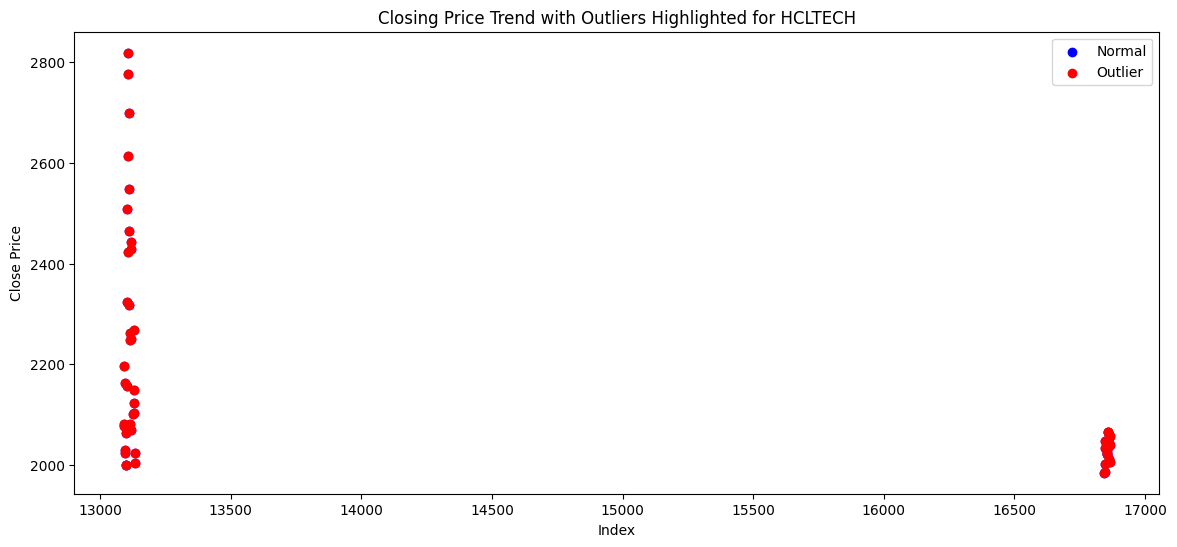

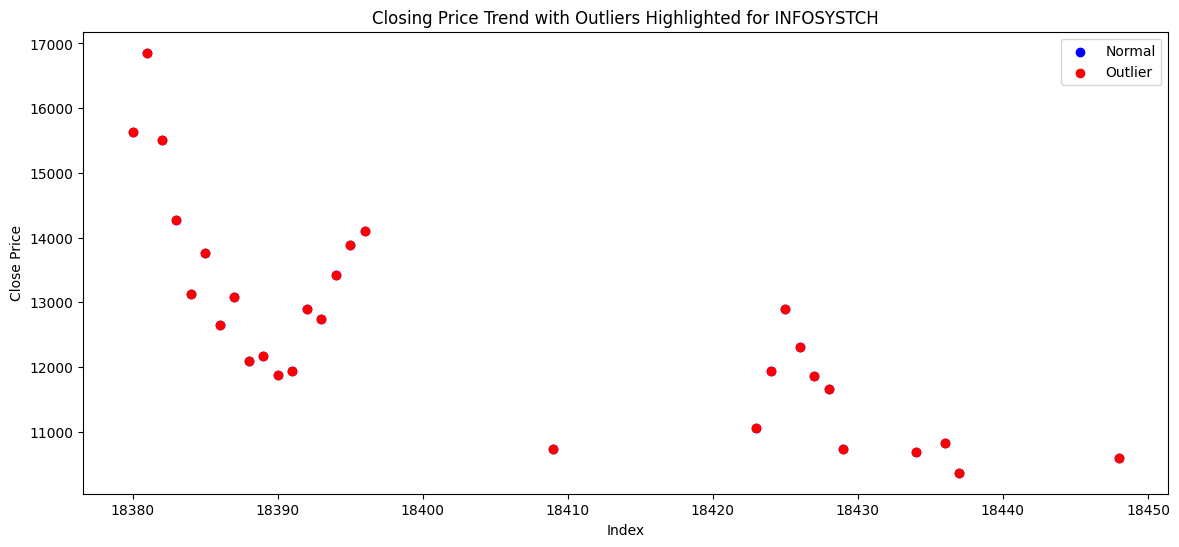

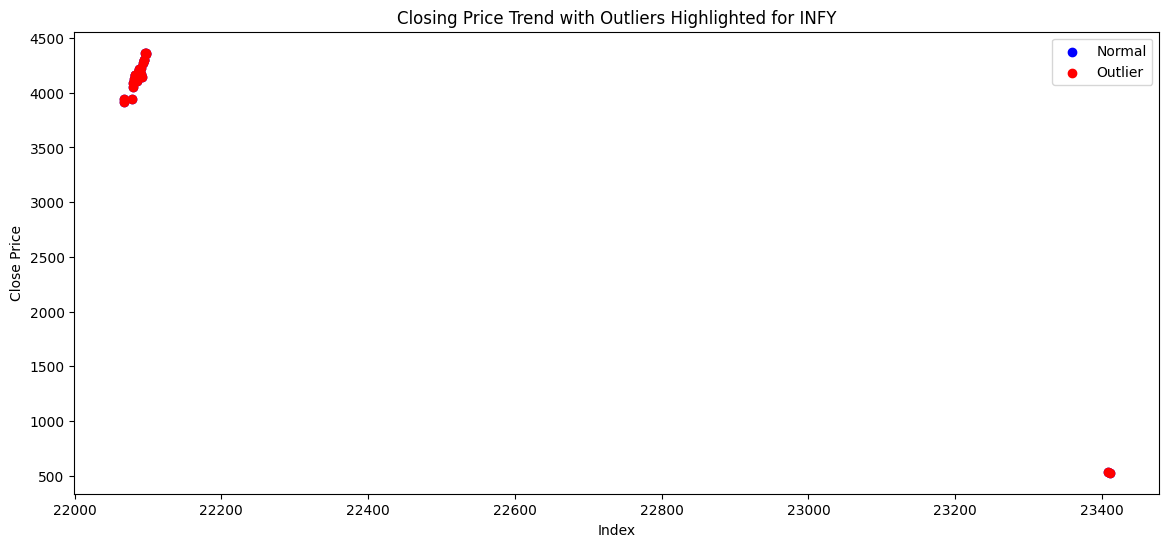

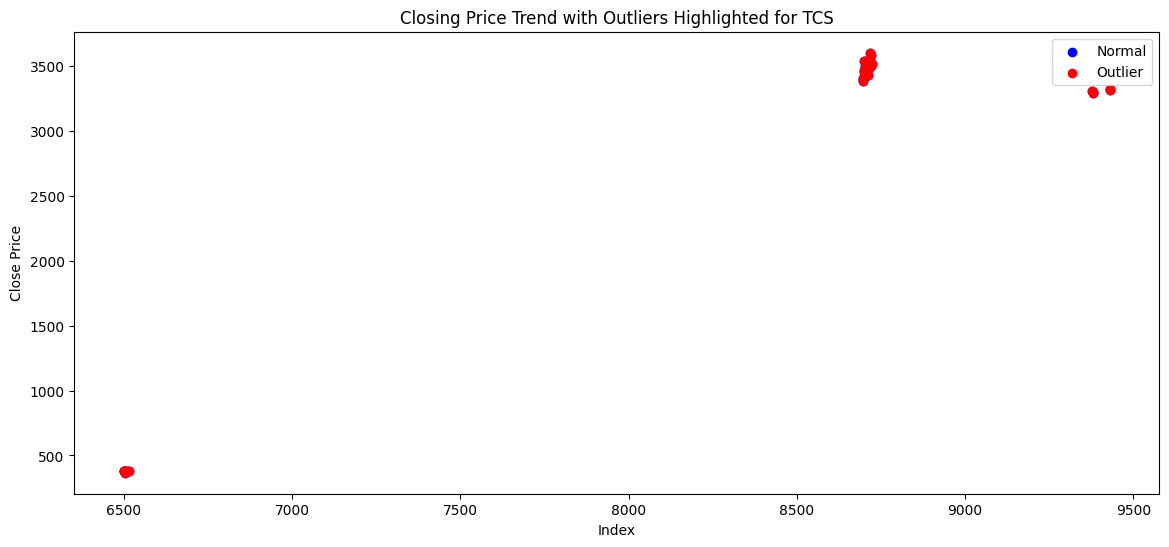

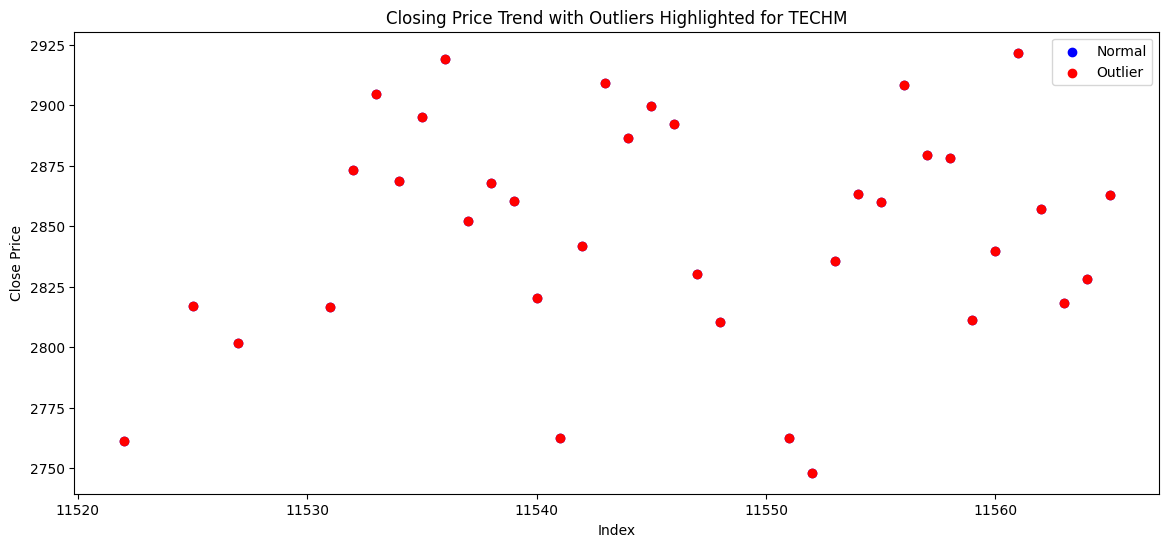

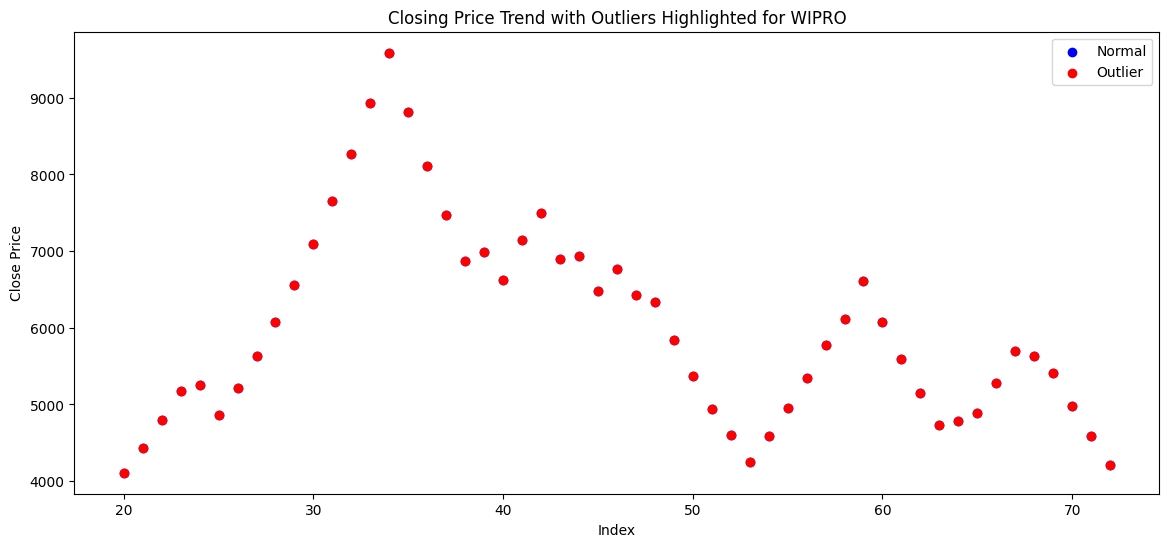

Outliers detected by Isolation Forest:
             Date   Symbol    Close
13090  2000-01-25  HCLTECH  2077.85
13091  2000-01-27  HCLTECH  2080.60
13092  2000-01-28  HCLTECH  2196.95
13093  2000-01-31  HCLTECH  2030.40
13094  2000-02-01  HCLTECH  2162.25
...           ...      ...      ...
68     2000-04-11    WIPRO  5627.95
69     2000-04-12    WIPRO  5413.80
70     2000-04-13    WIPRO  4980.70
71     2000-04-17    WIPRO  4582.25
72     2000-04-18    WIPRO  4215.70

[238 rows x 3 columns]


In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Information_Technology.csv')

# Group the data by 'Symbol' and perform outlier detection for each group
outliers_df = pd.DataFrame()

for sector, group in df.groupby('Symbol'):
    # Initialize Isolation Forest model
    iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

    # Reshape data for fitting
    X = group['Close'].values.reshape(-1, 1)

    # Fit the model
    iso_forest.fit(X)

    # Predict outliers
    group['Outlier'] = iso_forest.predict(X)

    # Append the results to the outliers dataframe
    outliers_df = pd.concat([outliers_df, group])

# Filter the outliers
outliers = outliers_df[outliers_df['Outlier'] == -1]

# Visualize the outliers for each sector
unique_sectors = outliers['Symbol'].unique()
for sector in unique_sectors:
    sector_data = outliers[outliers['Symbol'] == sector]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=sector_data, x='Date', y='Close', hue='Outlier', palette=['blue', 'red'])
    plt.title(f'Outliers in Closing Prices for {sector}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

# Display outliers
print("Outliers detected by Isolation Forest:")
print(outliers[['Date', 'Symbol', 'Close']])

In [ ]:
import pandas as pd

# Load the dataset from the URL
data = pd.read_csv('Information_Technology.csv')

# Replace missing values with mean
data.fillna(data.mean(), inplace=True)


<ipython-input-2-12cdae86fa58>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:
# prompt: replace the missing values with mean

import pandas as pd

# Load the dataset from the URL
df = pd.read_csv('Information_Technology.csv')

# Replace missing values with mean
df.fillna(data.mean(), inplace=True)

# Display the first five rows of the dataset
df.head()


<ipython-input-6-050c60fb4e50>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(data.mean(), inplace=True)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,WIPRO,EQ,2522.40,2724.00,2724.20,2724.00,2724.20,2724.20,2724.17,1599,4.355942e+11,72542.682899,1.021592e+06,0.499041
1,2000-01-04,WIPRO,EQ,2724.20,2942.15,2942.15,2942.15,2942.15,2942.15,2942.15,4392,1.292192e+12,72542.682899,1.021592e+06,0.499041
2,2000-01-05,WIPRO,EQ,2942.15,2942.15,3177.55,2715.00,3000.00,2990.10,3063.86,132297,4.053390e+13,72542.682899,1.021592e+06,0.499041
3,2000-01-06,WIPRO,EQ,2990.10,3144.70,3183.00,2790.00,2915.00,2932.25,2962.41,72840,2.157822e+13,72542.682899,1.021592e+06,0.499041
4,2000-01-07,WIPRO,EQ,2932.25,2751.00,2751.00,2697.70,2697.70,2697.70,2697.95,10110,2.727630e+12,72542.682899,1.021592e+06,0.499041


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


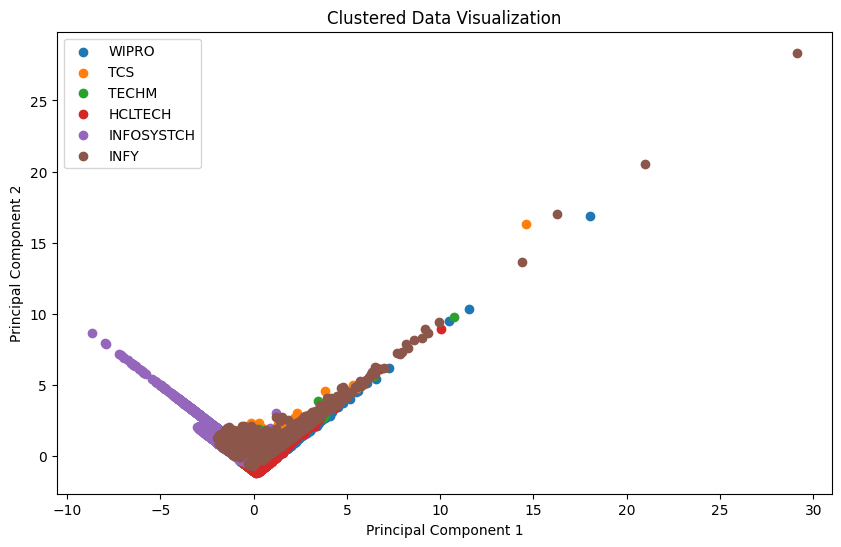

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Select features
features = df[['Deliverable Volume', 'Close']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters (Elbow Method code not shown)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plotting
plt.figure(figsize=(10, 6))
for i, symbol in enumerate(df['Symbol'].unique()):
    plt.scatter(reduced_features[df['Symbol'] == symbol, 0], reduced_features[df['Symbol'] == symbol, 1], label=symbol)
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [1]:
import pandas as pd

# Load the dataset from the URL
data = pd.read_csv('combined_dataset.csv')

# Replace missing values with mean
data.fillna(data.mean(), inplace=True)

# Display the first five rows of the dataset
data.head()


<ipython-input-1-9d054e5e5d34>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,61964.270982,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,61964.270982,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,61964.270982,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,61964.270982,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,61964.270982,816123.0,0.2741


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


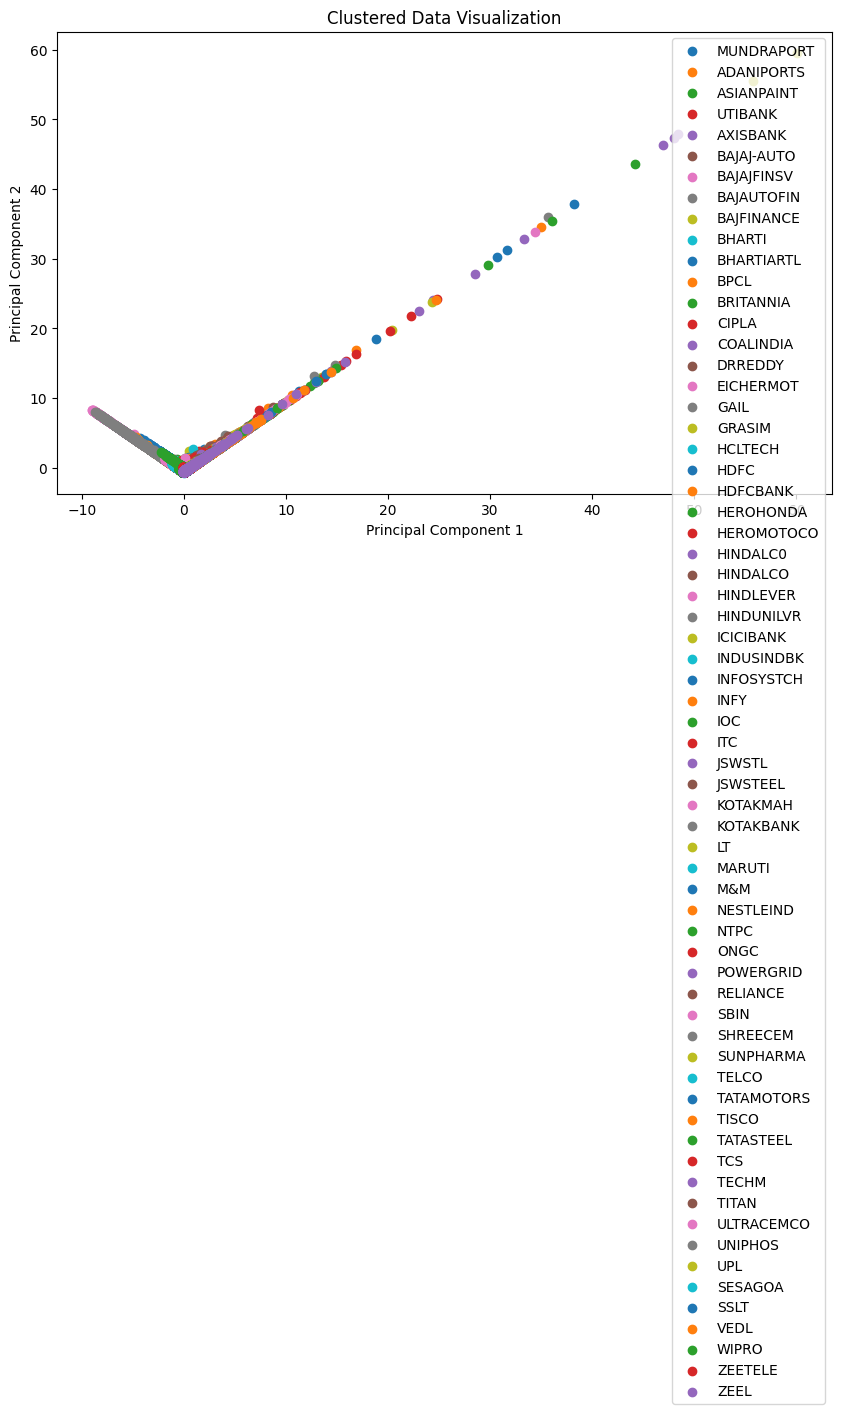

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Select features
features = data[['Deliverable Volume', 'Close']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters (Elbow Method code not shown)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plotting
plt.figure(figsize=(10, 6))
for i, symbol in enumerate(data['Symbol'].unique()):
    plt.scatter(reduced_features[data['Symbol'] == symbol, 0], reduced_features[data['Symbol'] == symbol, 1], label=symbol)
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()